# Xgboost for Health Data (Pipeline Step 3)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlalchemy as db
import sqlite3
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
df = df.drop(columns = ['id'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
target = df.stroke.values
features = df.drop(columns =["stroke"])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [41]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# Label Encoding
for f in df.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))   

In [44]:
for f in df.columns:
    print(f)

gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


In [45]:
# Label Encoding
for f in df.columns:
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,58.64,20.4,2,0
43396,0,56.0,0,0,1,0,1,213.61,55.4,0,0
43397,0,82.0,1,0,1,2,1,91.94,28.9,0,0
43398,1,40.0,0,0,1,2,1,99.16,33.2,2,0


In [42]:
# Label Encoding
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values))   

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate

In [13]:
import xgboost as xgb

In [17]:
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2021,
    tree_method='auto'
#    tree_method='hist'
#    tree_method='gpu_hist'
)

In [ ]:
## K Fold Cross Validation (5 Folds)

In [25]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
# Define Parameter grid for hyperparameter search process

In [22]:
param_grid = { 
    'colsample_bytree':[.75,1],
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'max_depth':[1,2,3,5],
    'subsample':[.75,1],
    'n_estimators': list(range(50, 400, 50))
}

In [ ]:
## Run the GridSearch,optimizing on ROC

In [26]:
grid_search = GridSearchCV(estimator=clf, scoring='roc_auc', param_grid=param_grid, n_jobs=-1, cv=kfold)

In [28]:
%%time
grid_result = grid_search.fit(X_train, y_train)

/home/david/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:05:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 27 s, sys: 996 ms, total: 28 s
Wall time: 20min 15s


In [29]:
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}','\n')

Best: 0.8617766137590029 using {'colsample_bytree': 0.75, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75} 



In [31]:
#Set our final hyperparameters to the tuned values
xgbcl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='binary:logistic', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto',
         colsample_bytree = grid_result.best_params_['colsample_bytree'], 
         learning_rate = grid_result.best_params_['learning_rate'], 
         max_depth = grid_result.best_params_['max_depth'], 
         subsample = grid_result.best_params_['subsample'], 
         n_estimators = grid_result.best_params_['n_estimators'])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#refit the model on k-folds to get stable avg error metrics
scores = cross_validate(estimator=xgbcl, X=X_train, y=y_train, cv=kfold, n_jobs=-1, 
                        scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

print('Training 5-fold Cross Validation Results:\n')
print('AUC: ', scores['test_roc_auc'].mean())
print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean(), '\n')

Training 5-fold Cross Validation Results:

AUC:  0.8632093427558646
Accuracy:  0.981278801843318
Precision:  0.0
Recall:  0.0
F1:  0.0 



In [33]:
import sklearn.metrics as metrics

[20:30:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report (Test): 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8547
           1       0.00      0.00      0.00       133

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.98      8680

Confusion matrix (Test): 

[[0.98467742 0.        ]
 [0.01532258 0.        ]]

Train Accuracy: 0.981278801843318
Test Accuracy: 0.9846774193548387

Train AUC: 0.8907315481700571
Test AUC: 0.8661175578468812


/home/david/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


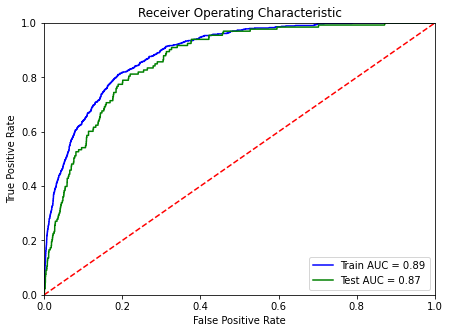

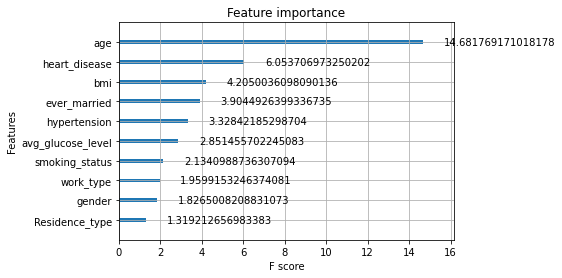

In [34]:
#Fit the final model
xgbcl.fit(X_train, y_train)

#Generate predictions against our training and test data
pred_train = xgbcl.predict(X_train)
proba_train = xgbcl.predict_proba(X_train)
pred_test = xgbcl.predict(X_test)
proba_test = xgbcl.predict_proba(X_test)

# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(y_test, pred_test))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))

print ('\nTrain AUC:', metrics.roc_auc_score(y_train, proba_train[:,1]))
print ('Test AUC:', metrics.roc_auc_score(y_test, proba_test[:,1]))

# calculate the fpr and tpr for all thresholds of the classification
train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, proba_train[:,1])
test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, proba_test[:,1])

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[7,5])
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# plot feature importance
xgb.plot_importance(xgbcl, importance_type='gain');

In [92]:
#take a random row of data
X_rand = features.sample(1, random_state = 5)
display(df.iloc[X_rand.index])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
33658,0,60.0,0,0,1,2,0,108.13,28.6,2,0


In [50]:
X = features

In [16]:
#Set our final hyperparameters to the tuned values
xgbcl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='binary:logistic', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto',
         colsample_bytree = grid_result.best_params_['colsample_bytree'], 
         learning_rate = grid_result.best_params_['learning_rate'], 
         max_depth = grid_result.best_params_['max_depth'], 
         subsample = grid_result.best_params_['subsample'], 
         n_estimators = grid_result.best_params_['n_estimators'])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#refit the model on k-folds to get stable avg error metrics
scores = cross_validate(estimator=xgbcl, X=X_train, y=y_train, cv=kfold, n_jobs=-1, 
                        scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

print('Training 5-fold Cross Validation Results:\n')
print('AUC: ', scores['test_roc_auc'].mean())
print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean(), '\n')

NameError: name 'grid_result' is not defined

In [49]:
#Generate predictions against our training and test data
pred_train = clf.predict(X_train)
proba_train = clf.predict_proba(X_train)
pred_test = clf.predict(X_test)
proba_test = clf.predict_proba(X_test)

In [52]:
import sklearn.metrics as metrics
# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(y_test, pred_test))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))

print ('\nTrain AUC:', metrics.roc_auc_score(y_train, proba_train[:,1]))
print ('Test AUC:', metrics.roc_auc_score(y_test, proba_test[:,1]))


Classification report (Test): 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8547
           1       0.20      0.02      0.03       133

    accuracy                           0.98      8680
   macro avg       0.59      0.51      0.51      8680
weighted avg       0.97      0.98      0.98      8680

Confusion matrix (Test): 

[[9.83755760e-01 9.21658986e-04]
 [1.50921659e-02 2.30414747e-04]]

Train Accuracy: 0.9959389400921659
Test Accuracy: 0.9839861751152074

Train AUC: 0.9999601273396401
Test AUC: 0.835284948066903


In [53]:
# calculate the fpr and tpr for all thresholds of the classification
train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, proba_train[:,1])
test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, proba_test[:,1])

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

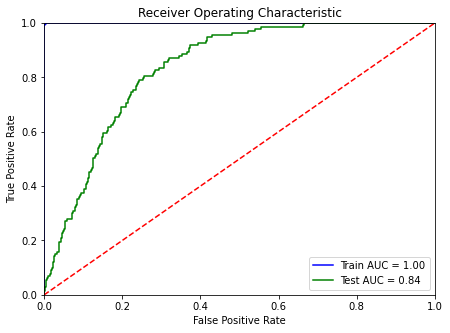

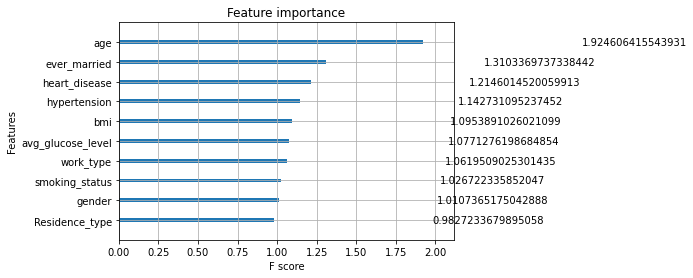

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[7,5])
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# plot feature importance
xgb.plot_importance(clf, importance_type='gain');

In [60]:
#take a random row of data
X_rand = features.sample(1, random_state = 5)
display(df.iloc[X_rand.index])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
33658,Female,60.0,0,0,Yes,Private,Rural,108.13,28.6,never smoked,0


In [89]:
import shap

In [84]:
## kernel shap sends data as numpy array which has no column names, so we fix it
def xgb_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_names)
    return estimator.predict(data_asframe)

In [81]:
#### Kernel SHAP
X_summary = shap.kmeans(X_train, 10)

In [83]:
#shap_kernel_explainer = shap.KernelExplainer(xgbcl, X_summary)

In [59]:
def xgb_predict(df):
    data_asframe =  pd.DataFrame(df, columns=feature_names)
    return estimator.predict(data_asframe)

In [68]:
#### Tree SHAP
shap_tree_explainer = shap.TreeExplainer(xgbcl, feature_perturbation = "interventional")

In [77]:
shap.initjs()
## shapely values with kernel SHAP
shap.force_plot(shap_tree_explainer.expected_value, shap_values_single, X_test.iloc[[5]])

In [69]:
shap.initjs()
## shapely values with Tree SHAP
shap_values_single = shap_tree_explainer.shap_values(X_test.iloc[[10]])
shap.force_plot(shap_tree_explainer.expected_value, shap_values_single, X_test.iloc[[5]])

AssertionError: Feature and SHAP matrices must have the same number of rows!

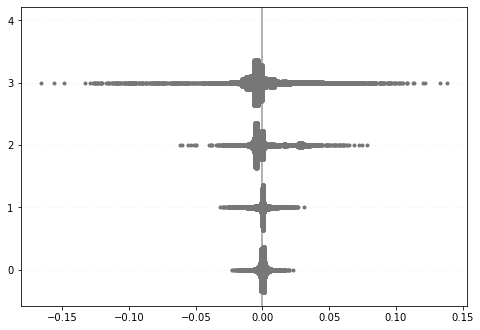

In [71]:
shap_values = shap_tree_explainer.shap_values(X_train)
shap.summary_plot(shap_values, features)

In [108]:
# #Display all features and SHAP values
# display(pd.DataFrame(data=shap_values, columns=X_train.columns, index=[126]).transpose().sort_values(by=126, ascending=True))

In [72]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

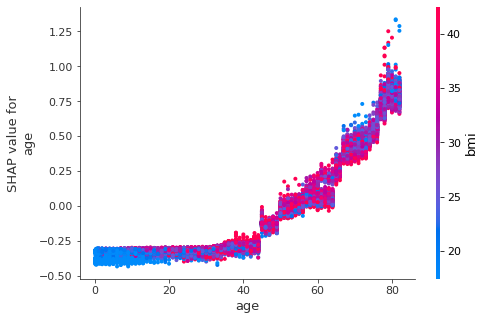

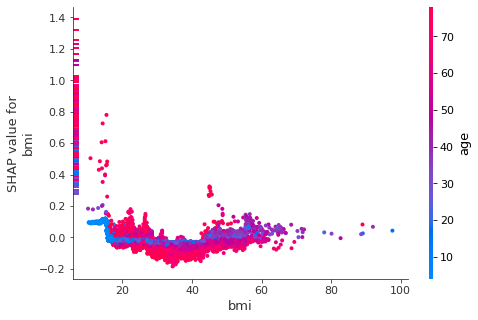

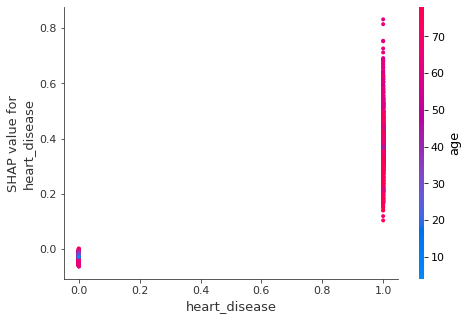

In [73]:
shap.dependence_plot('age', shap_values, X_train, interaction_index='bmi')
shap.dependence_plot('bmi', shap_values, X_train) #when we don't specify an interaction_index, the strongest one is automatically chosen for us
shap.dependence_plot('heart_disease', shap_values, X_train, interaction_index='age')